In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Train.csv")
cube = pd.pivot_table(
    df,
    values="Cost_of_the_Product",
    index="Warehouse_block",
    columns="Mode_of_Shipment",
    aggfunc="mean"
).round(2)

cube

Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,200.04,193.00,210.84
B,198.15,200.15,219.33
C,198.59,203.06,189.87
D,199.07,204.70,200.38
F,193.00,193.89,202.06


In [16]:
rollup = (
    df.groupby("Warehouse_block")["Cost_of_the_Product"]
      .mean()
      .round(2)
      .reset_index()
)

rollup

,Warehouse_block,Cost_of_the_Product
0,A,202.28
1,B,205.34
2,C,197.39
3,D,201.38
4,F,195.77


In [17]:
drilldown = (
    df.groupby(["Warehouse_block", "Product_importance"])
      ["Cost_of_the_Product"]
      .mean()
      .round(2)
      .reset_index()
)

drilldown

,Warehouse_block,Product_importance,Cost_of_the_Product
0,A,high,198.64
1,A,low,209.38
2,A,medium,199.25
3,B,high,208.00
4,B,low,202.77
5,B,medium,205.00
6,C,high,192.77
7,C,low,204.41
8,C,medium,192.58
9,D,high,199.44


In [18]:
slice_table = (
    df[df["Mode_of_Shipment"] == "Ship"]
      .groupby("Warehouse_block")["Cost_of_the_Product"]
      .mean()
      .round(2)
      .reset_index()
)

slice_table

,Warehouse_block,Cost_of_the_Product
0,A,210.84
1,B,219.33
2,C,189.87
3,D,200.38
4,F,202.06


In [19]:
dice_table = (
    df[
        (df["Mode_of_Shipment"].isin(["Ship", "Flight"])) &
        (df["Product_importance"] == "high") &
        (df["Customer_rating"] >= 4)
    ]
    .groupby(["Warehouse_block", "Mode_of_Shipment"])
    ["Cost_of_the_Product"]
    .mean()
    .round(2)
    .reset_index()
)

dice_table

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product
0,A,Flight,198.80
1,A,Ship,193.91
2,B,Flight,214.20
3,B,Ship,210.25
4,C,Flight,230.20
5,C,Ship,178.40
6,D,Flight,182.33
7,D,Ship,252.00
8,F,Flight,199.30
9,F,Ship,203.58


In [20]:
pivot = (
    pd.pivot_table(
        df,
        values="Reached.on.Time_Y.N",
        index="Mode_of_Shipment",
        columns="Product_importance",
        aggfunc="mean"
    )
    .mul(100)
    .round(2)
)

pivot

Product_importance,high,low,medium
Mode_of_Shipment,,,
Flight,43.24,41.44,54.00
Road,65.71,52.38,38.60
Ship,50.94,58.62,50.45


In [21]:
delivery_table = (
    df.groupby("Warehouse_block")["Reached.on.Time_Y.N"]
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

delivery_table

,Warehouse_block,Reached.on.Time_Y.N
0,A,56.85
1,B,49.44
2,C,52.34
3,D,47.42
4,F,46.43


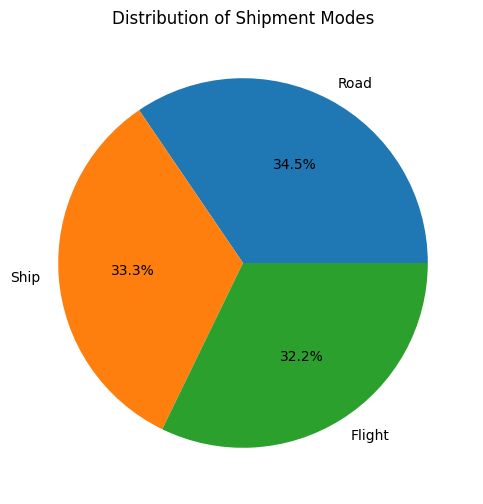

In [10]:
shipment_counts = df["Mode_of_Shipment"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    shipment_counts,
    labels=shipment_counts.index,
    autopct='%1.1f%%'
)

plt.title("Distribution of Shipment Modes")
plt.show()